In [1]:
# HOMEWORK 8: CURVE FITTING AND LINEAR REGRESSION

In [2]:
import matplotlib.pyplot as plt
import scipy.optimize as fit
import numpy as np
import pandas as pd

In [5]:
# 1) Curve Fitting Guided Problem

# (1a)
df = pd.read_csv("GlobalLandTemperaturesByState.csv")
state_temps = df.drop(columns=["AverageTemperatureUncertainty", "Country"])
filtered = state_temps.loc[(state_temps["dt"] >= "2000-01-01") & (state_temps["State"].isin(["Wyoming", "Nebraska", "South Dakota"]))]
filtered

,dt,AverageTemperature,State
350761,2000-01-01,-2.024,Nebraska
350762,2000-02-01,1.719,Nebraska
350763,2000-03-01,5.687,Nebraska
350764,2000-04-01,9.417,Nebraska
350765,2000-05-01,16.827,Nebraska
...,...,...,...
626435,2013-05-01,10.607,Wyoming
626436,2013-06-01,16.267,Wyoming
626437,2013-07-01,20.222,Wyoming
626438,2013-08-01,19.621,Wyoming


In [11]:
# (1b)

grouped_avgs = filtered.groupby("dt")["AverageTemperature"].mean().reset_index()
grouped_avgs

,dt,AverageTemperature
0,2000-01-01,-4.072000
1,2000-02-01,-0.205000
2,2000-03-01,3.642667
3,2000-04-01,7.609667
4,2000-05-01,14.255000
...,...,...
160,2013-05-01,13.196000
161,2013-06-01,18.783667
162,2013-07-01,22.110333
163,2013-08-01,21.890000


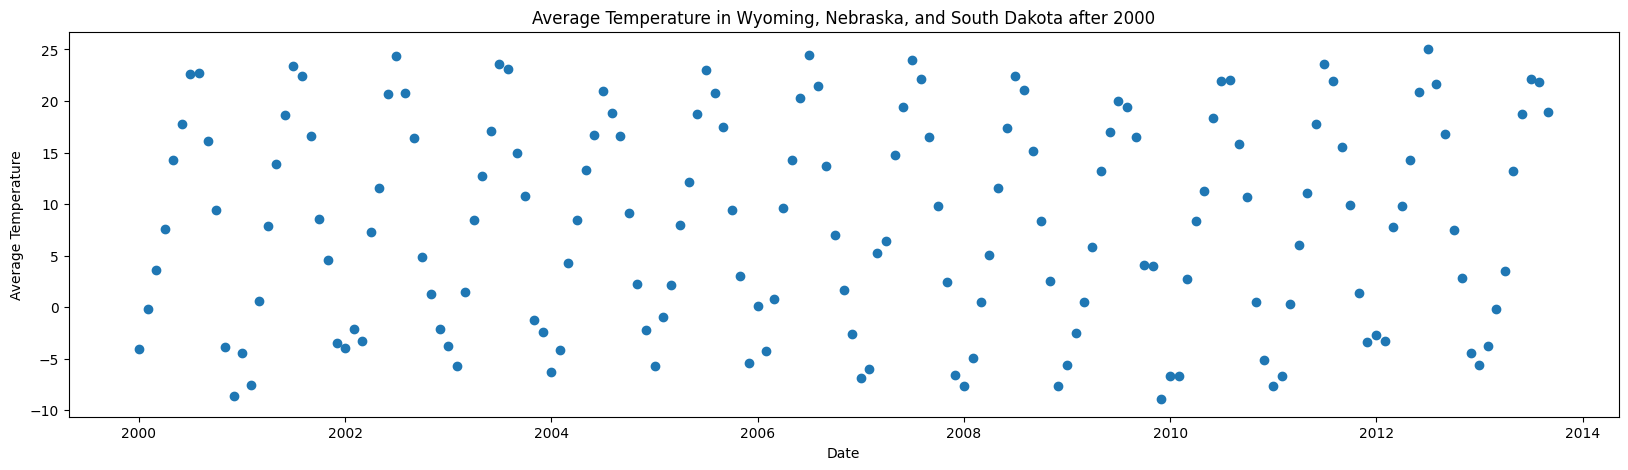

In [48]:
# (1c)

plt.figure(figsize = (20,5))
plt.scatter(grouped_avgs["dt"], grouped_avgs["AverageTemperature"])


plt.title("Average Temperature in Wyoming, Nebraska, and South Dakota after 2000")
plt.xlabel("Date")
plt.ylabel("Average Temperature")

plt.show()

In [113]:
# (1d)

import datetime as date

grouped_avgs["dt"] = pd.to_datetime(grouped_avgs["dt"])

def to_decimal(date):
    return date.year + date.month/12 + date.day/(60*60)

grouped_avgs["Decimal Date"] = grouped_avgs["dt"].apply(to_decimal)

grouped_avgs

,dt,AverageTemperature,Decimal Date
0,2000-01-01,-4.072000,2000.083611
1,2000-02-01,-0.205000,2000.166944
2,2000-03-01,3.642667,2000.250278
3,2000-04-01,7.609667,2000.333611
4,2000-05-01,14.255000,2000.416944
...,...,...,...
160,2013-05-01,13.196000,2013.416944
161,2013-06-01,18.783667,2013.500278
162,2013-07-01,22.110333,2013.583611
163,2013-08-01,21.890000,2013.666944


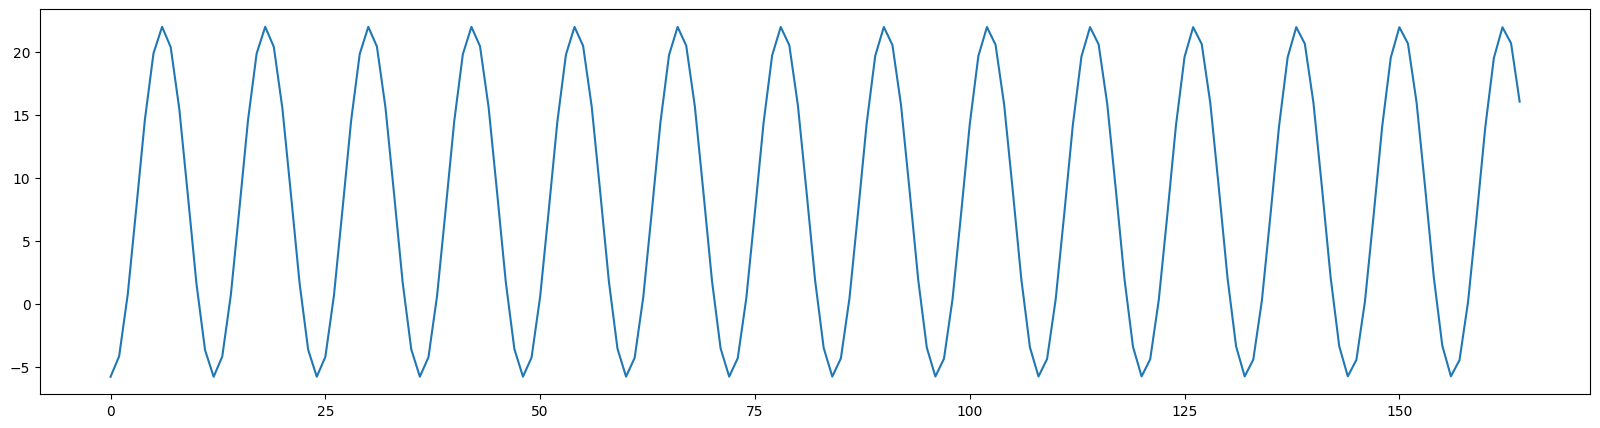

array([-13.89958759,   1.00060705,   8.6364075 ,   8.12295063])

In [130]:
# (1e) and (1f)

def sine(x, a, b, c, d):
    return a*np.sin((2*np.pi/b)*x + c) + d

p0 = [15, 1, 0, 10]

par, cov = fit.curve_fit(sine, grouped_avgs["Decimal Date"], grouped_avgs["AverageTemperature"], p0)

plt.figure(figsize = (20,5))
plt.plot(sine(grouped_avgs["Decimal Date"], par[0], par[1], par[2], par[3]))
plt.show()
par

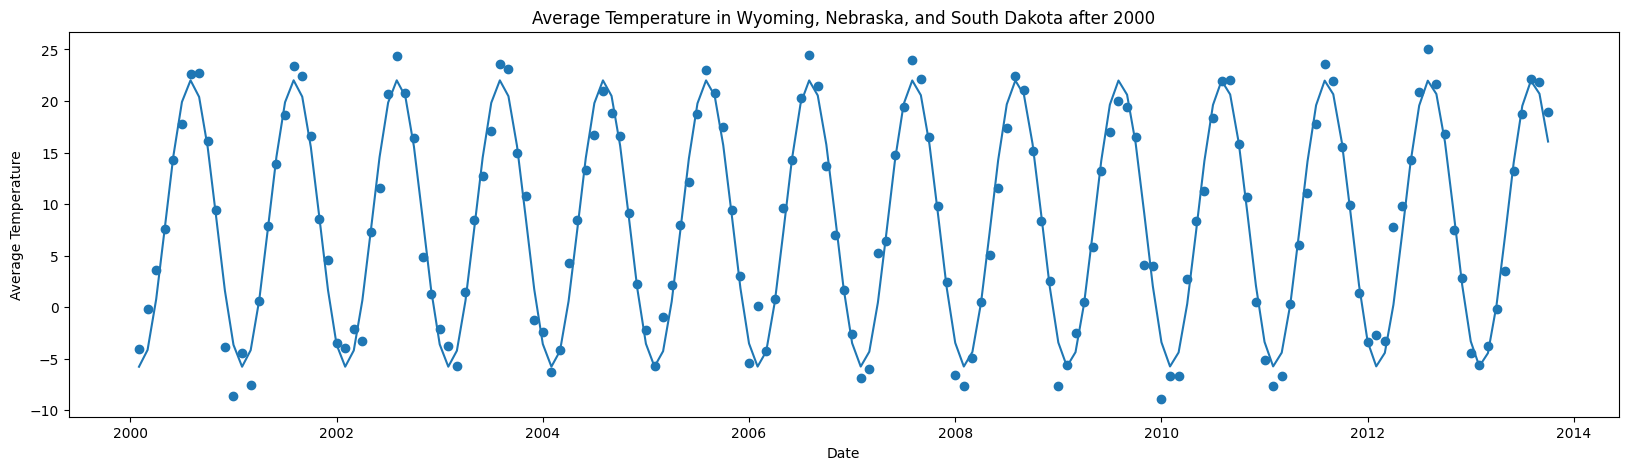

In [131]:
# (1g)


plt.figure(figsize = (20,5))
plt.scatter(grouped_avgs["Decimal Date"], grouped_avgs["AverageTemperature"])
plt.plot(grouped_avgs["Decimal Date"], sine(grouped_avgs["Decimal Date"], par[0], par[1], par[2], par[3]))

plt.title("Average Temperature in Wyoming, Nebraska, and South Dakota after 2000")
plt.xlabel("Date")
plt.ylabel("Average Temperature")

plt.show()

In [139]:
# (1h) and (1i)

errors = [cov[0][0], cov[1][1], cov[2][2], cov[3][3]]
errors

print(f"Amplitude: {par[0]} +/- {errors[0]}\nPeriod: {par[1]} +/- {errors[1]}\nPhase Shift: {par[2]} +/- {errors[2]}\nVertical Shift: {par[3]} +/- {errors[3]}\n")

Amplitude: -13.899587594716417 +/- 0.05123964951702692
Period: 1.0006070460485201 +/- 4.3914687969855423e-07
Phase Shift: 8.636407499550785 +/- 69.65804417860885
Vertical Shift: 8.122950629686695 +/- 0.025762142013522754



In [ ]:
# 2) Random Plotting Practice